In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's use the world data sets again

In [2]:
country_data = pd.read_csv("world_data/world_data.csv") \
                .rename(columns={'\ufeffCountry Name': "Country Name"}) \
                .dropna(thresh=2)

In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1069
Data columns (total 6 columns):
Country Name     1070 non-null object
Country Code     1070 non-null object
Series Name      1070 non-null object
Series Code      1070 non-null object
2000 [YR2000]    928 non-null float64
2013 [YR2013]    445 non-null float64
dtypes: float64(2), object(4)
memory usage: 58.5+ KB


In [4]:
country_data.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2013 [YR2013]
0,Afghanistan,AFG,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,54.310841
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,54.848561,60.931415
2,Afghanistan,AFG,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,23.200000,NaN
3,Afghanistan,AFG,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,22.100000,NaN
4,Afghanistan,AFG,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,27.000000,75.000000


In [7]:
indicators = country_data.pivot_table(index="Country Name", columns="Series Name", 
                                      values="2000 [YR2000]")
indicators.head()

Series Name,"Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Life expectancy at birth, total (years)","School enrollment, secondary (% gross)"
Country Name,,,,,
Afghanistan,27,23.2,22.1,54.848561,NaN
Albania,95,83.8,96.5,74.272073,66.67894
Algeria,80,92.2,89.4,68.930195,61.92001
American Samoa,NaN,61.5,97.8,NaN,NaN
Andorra,97,100.0,100.0,NaN,NaN


For now we want to narrow our scope down to just a single X and a single Y.

In [8]:
indicators[['School enrollment, secondary (% gross)',
            'Life expectancy at birth, total (years)']].dropna(thresh=2).head()

Series Name,"School enrollment, secondary (% gross)","Life expectancy at birth, total (years)"
Country Name,,
Albania,66.678940,74.272073
Algeria,61.920010,68.930195
Angola,14.858310,45.204780
Antigua and Barbuda,77.874542,73.397293
Argentina,86.550858,73.745659


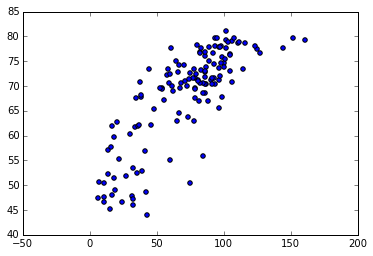

In [9]:
plt.scatter(indicators['School enrollment, secondary (% gross)'], 
            indicators['Life expectancy at birth, total (years)'])
plt.show()

Let's let scikit-learn do the work here

In [10]:
from sklearn import linear_model

Lets get our X and Y
* X -> School Enrollment in secondary level education
* Y -> Life Expectancy at birth

In [13]:
df = indicators[['School enrollment, secondary (% gross)', 
                  'Life expectancy at birth, total (years)']]

In [14]:
df.head()

Series Name,"School enrollment, secondary (% gross)","Life expectancy at birth, total (years)"
Country Name,,
Afghanistan,NaN,54.848561
Albania,66.67894,74.272073
Algeria,61.92001,68.930195
American Samoa,NaN,NaN
Andorra,NaN,NaN


In [17]:
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)']]
life_expectancy = df['Life expectancy at birth, total (years)']

Create a new ```LinearRegression``` classifier and fit our data (from above) into our model.

We can print relevant data to this model once our model has been fit.

In [18]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, life_expectancy)
print('Coefficients: \n', regr1.coef_)
print(regr1.score(input_data, life_expectancy))

Coefficients: 
 [ 0.24258833]
0.648726431964


Time to plot like a baller

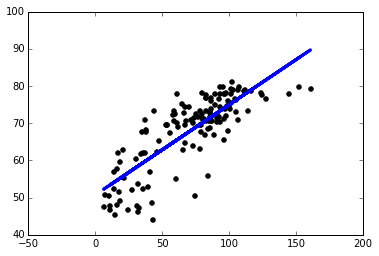

In [20]:
plt.scatter(input_data, life_expectancy,  color='black')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)
plt.show()

This is how we can predict specific values on our model:

In [21]:
regr1.predict(80)[0]

70.158689151464927

This is cool but not super exciting.  What if we tried 2 x's to find out a y?

In the case below we will fit Sanitation Facilities & Access to Water sources with the Life Expectancy.  Now that would be cool

In [23]:
df = indicators[['Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]

In [24]:
df.head()

Series Name,Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Life expectancy at birth, total (years)"
Country Name,,,
Afghanistan,23.2,22.1,54.848561
Albania,83.8,96.5,74.272073
Algeria,92.2,89.4,68.930195
American Samoa,61.5,97.8,NaN
Andorra,100.0,100.0,NaN


In [25]:
df.dropna(inplace=True)
input_data = df[['Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

/Users/jeff/python/2015-06/class-notes/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Taking our ```input_data``` and ```life_expectancy``` from above we can fit a new LinearRegression model to our new data and get relevant information about it.

In [29]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, life_expectancy)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(input_data, life_expectancy))

Coefficients: 
 [ 0.18063297  0.17222788]
0.727755785254


Since we are fitting on multiple dimensions we can even do a 3d plot. 3d Plots don't tell an incredible amount of information to the lay-man but they sure look cool.

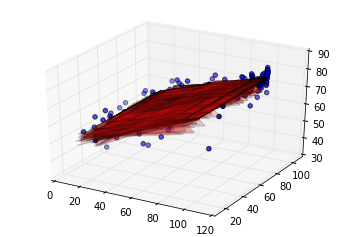

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = input_data['Improved sanitation facilities (% of population with access)']
yy = input_data['Improved water source (% of population with access)']
zz = life_expectancy
predict = regr2.predict(input_data)
x_surf, y_surf = np.meshgrid(xx, yy)
ax.plot_surface(x_surf, y_surf, predict, color="red", alpha=0.1)
ax.scatter(xx, yy, zz)
plt.show()

With multiple X's how do we predict on those? Easy! Pass a feature vector representing %'s of their respective category and our model will predict the life expectancy based on those values.

In [31]:
print(regr2.predict([80, 80]))
print(regr2.predict([85, 80]))
print(regr2.predict([80, 85]))
print(regr2.predict([82.5, 82.5]))

[ 68.24205914]
[ 69.14522398]
[ 69.10319853]
[ 69.12421125]


What about reducing down to just 2 dimensions for a little bit easier graphing experience.

Notice we just multiply the vectors together to get the xx variable. Our yy remains as the life expectancy.

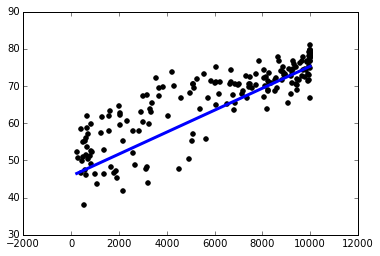

In [33]:
x1 = input_data['Improved sanitation facilities (% of population with access)']
x2 = input_data['Improved water source (% of population with access)']
yy = life_expectancy
predict = regr2.predict(input_data)
xx = x1 * x2
plt.scatter(xx, yy,  color='black')
plt.plot((min(xx), max(xx)), (min(predict), max(predict)), color='blue', linewidth=3)
plt.show()

Let's add yet another dimension in there

In [34]:
df = indicators[['School enrollment, secondary (% gross)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']

/Users/jeff/python/2015-06/class-notes/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
regr3 = linear_model.LinearRegression()
fit = regr3.fit(input_data, life_expectancy)
print(regr3.score(input_data, life_expectancy))

0.754177780417


Now that we have an even stronger model what can we predict.  Let's try walking through the values to find out.

In [36]:
for i in range(1, 11):
    print("School Enrollment: {}".format(i*10), regr3.predict([i * 10, 100, 100]))
    print("Sanitation Access: {}".format(i*10), regr3.predict([100, i * 10, 100]))
    print("Water Access: {}".format(i*10), regr3.predict([100, 100, i * 10]))
    print("-----\n")

School Enrollment: 10 [ 69.46838844]
Sanitation Access: 10 [ 65.91890932]
Water Access: 10 [ 59.22903565]
-----

School Enrollment: 20 [ 70.18725068]
Sanitation Access: 20 [ 67.03215813]
Water Access: 20 [ 61.08560376]
-----

School Enrollment: 30 [ 70.90611292]
Sanitation Access: 30 [ 68.14540694]
Water Access: 30 [ 62.94217187]
-----

School Enrollment: 40 [ 71.62497516]
Sanitation Access: 40 [ 69.25865576]
Water Access: 40 [ 64.79873998]
-----

School Enrollment: 50 [ 72.34383741]
Sanitation Access: 50 [ 70.37190457]
Water Access: 50 [ 66.65530808]
-----

School Enrollment: 60 [ 73.06269965]
Sanitation Access: 60 [ 71.48515338]
Water Access: 60 [ 68.51187619]
-----

School Enrollment: 70 [ 73.78156189]
Sanitation Access: 70 [ 72.59840219]
Water Access: 70 [ 70.3684443]
-----

School Enrollment: 80 [ 74.50042413]
Sanitation Access: 80 [ 73.711651]
Water Access: 80 [ 72.22501241]
-----

School Enrollment: 90 [ 75.21928638]
Sanitation Access: 90 [ 74.82489981]
Water Access: 90 [ 74.081

And one more dimension

In [37]:
df = indicators.loc[:, ['School enrollment, secondary (% gross)',
                        'Immunization, measles (% of children ages 12-23 months)',
                        'Improved sanitation facilities (% of population with access)',
                        'Improved water source (% of population with access)',
                        'Life expectancy at birth, total (years)']]
df.dropna(inplace=True)
input_data = df[['School enrollment, secondary (% gross)', 
                 'Immunization, measles (% of children ages 12-23 months)',
                 'Improved sanitation facilities (% of population with access)',
                 'Improved water source (% of population with access)']]
life_expectancy = df['Life expectancy at birth, total (years)']
regr4 = linear_model.LinearRegression()
fit = regr4.fit(input_data, life_expectancy)
print(regr4.score(input_data, life_expectancy))

0.757823778859


#Automatically picking the best features

In [38]:
import itertools
dependent_vars = list(indicators.columns)
dependent_vars.remove('Life expectancy at birth, total (years)')
combos = list(itertools.combinations(dependent_vars, 2))

In [41]:
def regression_for(combo):
    combo = list(combo)
    df = indicators.loc[:, combo + ['Life expectancy at birth, total (years)']]
    df.dropna(inplace=True)
    input_data = df[combo]
    life_expectancy = df['Life expectancy at birth, total (years)']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, life_expectancy)
    return regr, regr.score(input_data, life_expectancy)

In [42]:
choices = []

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Improved water source (% of population with access)', 'School enrollment, secondary (% gross)'), 0.73064421436970339)
[ 0.28184565  0.11643609] 35.7634019124
